In [18]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/studentVle.csv")

In [ ]:
df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0


In [ ]:
features = df[['id_site', 'date', 'sum_click']].dropna()
activity_labels = df['code_presentation']

In [ ]:
unique_activities = df['id_site'].unique()

In [ ]:
num_seen = int(0.8 * len(unique_activities))
seen_activities = unique_activities[:num_seen]
unseen_activities = unique_activities[num_seen:]

In [ ]:
df_seen = df[df['id_site'].isin(seen_activities)].dropna(subset=['sum_click'])
df_unseen = df[df['id_site'].isin(unseen_activities)].dropna(subset=['sum_click'])

In [ ]:
model = Word2Vec([str(activity).split() for activity in unique_activities], vector_size=3, window=5, min_count=1, sg=1)


In [ ]:
X_seen = np.array([model.wv[str(activity).split()] for activity in df_seen['id_site']])
y_seen = df_seen['sum_click'].values

In [ ]:
X_unseen = np.array([model.wv[str(activity).split()] for activity in df_unseen['id_site']])
y_unseen = df_unseen['sum_click'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_seen.reshape(len(X_seen), -1), y_seen, test_size=0.3, random_state=42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

In [ ]:
y_pred_seen = mlp.predict(X_test)
accuracy_seen = accuracy_score(y_test, y_pred_seen)
print(f'Accuracy on seen activities: {accuracy_seen * 100:.2f}%')

Accuracy on seen activities: 39.36%


In [17]:
y_pred_unseen = mlp.predict(X_unseen.reshape(len(X_unseen), -1))

In [16]:
accuracy_unseen = accuracy_score(y_unseen, y_pred_unseen)
print(f'Accuracy on unseen activities: {accuracy_unseen * 100:.2f}%')

Accuracy on unseen activities: 34.34%


In [19]:
labels = ['Seen Activities', 'Unseen Activities']

In [21]:
accuracies = [accuracy_seen, accuracy_unseen]

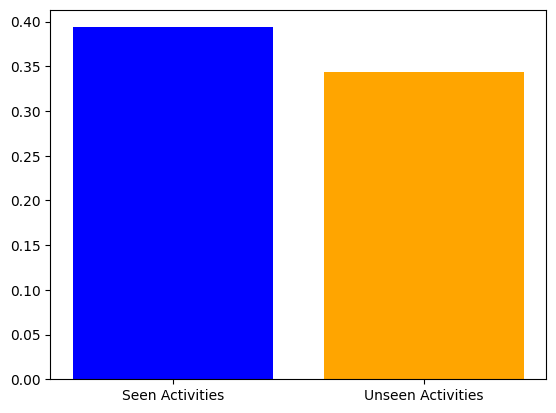

In [22]:
fig, ax = plt.subplots()
bar_plot = ax.bar(labels, accuracies, color=['blue', 'orange'])

In [23]:
ax.set_title('Model Accuracy on Seen and Unseen Activities')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])

(0.0, 1.0)

In [24]:
for bar in bar_plot:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval * 100:.1f}%', va='bottom', ha='center')

In [27]:
plt.show()